In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cmocean import cm

%matplotlib inline

In [3]:
path_gofs = "https://tds.hycom.org/thredds/dodsC/GLBy0.08/expt_93.0"
ds = xr.open_dataset(path_gofs, drop_variables="tau")
ds

<xarray.Dataset>
Dimensions:            (lat: 4251, lon: 4500, time: 9841, depth: 40)
Coordinates:
  * lat                (lat) float64 -80.0 -79.96 -79.92 ... 89.92 89.96 90.0
  * lon                (lon) float64 0.0 0.07996 0.16 0.24 ... 359.8 359.8 359.9
  * time               (time) datetime64[ns] 2018-12-04T12:00:00 ... 2022-04-...
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    surf_el            (time, lat, lon) float32 ...
    water_temp         (time, depth, lat, lon) float32 ...
    water_temp_bottom  (time, lat, lon) float32 ...
    salinity           (time, depth, lat, lon) float32 ...
    salinity_bottom    (time, lat, lon) float32 ...
    water_u            (time, depth, lat, lon) float32 ...
    water_u_bottom     (time, lat, lon) float32 ...
    water_v            (time, depth, lat, lon) float32 ...
    water_v_bottom     (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1

In [4]:
# Subset the model of the Mid atlantic bight
lons = [-77, -67]
lats = [35, 43]

We can see above that the longitudes go from 0 to 360 in the GOFS dataset. Let's convert the longitudes that we want to use to subset the model from -180,180 to 0, 360 degrees.

In [5]:
# # Convert the lons to the GOFS 0, 360 lon format
lons = np.mod(lons, 360).tolist()
lons

[283, 293]

Next, we are going to select a subset from the xarray Dataset.

We can use the the .sel function to explicitly select the data within the extent defined by the lons and lats variable that we just created, but first we need to sort the list that we just defined. 
Since we want to slice passed to the slice in monotonically increasing order

In [6]:
# Sort the lons and lats
lons.sort()
lats.sort()

In [7]:
tds = ds.sel(lon=slice(lons[0], lons[1]), lat=slice(lats[0], lats[1])).isel(time=-1)
tds

<xarray.Dataset>
Dimensions:            (lat: 201, lon: 125, depth: 40)
Coordinates:
  * lat                (lat) float64 35.0 35.04 35.08 35.12 ... 42.92 42.96 43.0
  * lon                (lon) float64 283.0 283.1 283.2 ... 292.8 292.9 293.0
    time               datetime64[ns] 2022-04-18T09:00:00
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    surf_el            (lat, lon) float32 ...
    water_temp         (depth, lat, lon) float32 ...
    water_temp_bottom  (lat, lon) float32 ...
    salinity           (depth, lat, lon) float32 ...
    salinity_bottom    (lat, lon) float32 ...
    water_u            (depth, lat, lon) float32 ...
    water_u_bottom     (lat, lon) float32 ...
    water_v            (depth, lat, lon) float32 ...
    water_v_bottom     (lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1

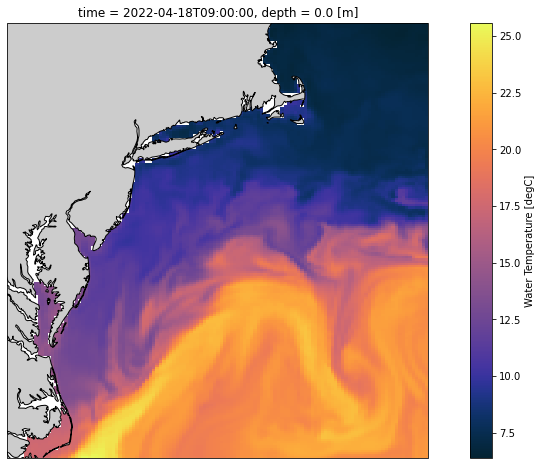

In [8]:
fig, ax = plt.subplots(
    figsize=(15, 8),
    subplot_kw=dict(projection=ccrs.Mercator())
)

tds.water_temp.isel(depth=0).plot(x="lon", y="lat", transform=ccrs.PlateCarree(), cmap=cm.thermal)

coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.8"
)
ax.add_feature(coast_10m)

In [9]:
# # Let's save this section to NetCDF so that we can work on this locally 
# tds.to_netcdf("/Users/mikesmith/Documents/rtofs_mab.nc")

In [10]:
# # Close opened datasets
# tds.close()
# ds.close()

In [11]:
# ds = xr.open_dataset("/Users/mikesmith/Documents/rtofs_mab.nc")
# ds

<xarray.Dataset>
Dimensions:            (lat: 201, lon: 125, depth: 40)
Coordinates:
  * lat                (lat) float64 35.0 35.04 35.08 35.12 ... 42.92 42.96 43.0
  * lon                (lon) float64 283.0 283.1 283.2 ... 292.8 292.9 293.0
    time               datetime64[ns] ...
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    surf_el            (lat, lon) float32 ...
    water_temp         (depth, lat, lon) float32 ...
    water_temp_bottom  (lat, lon) float32 ...
    salinity           (depth, lat, lon) float32 ...
    salinity_bottom    (lat, lon) float32 ...
    water_u            (depth, lat, lon) float32 ...
    water_u_bottom     (lat, lon) float32 ...
    water_v            (depth, lat, lon) float32 ...
    water_v_bottom     (lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1

In [9]:
ds = tds

In [10]:
ds["lon"] = np.mod(ds["lon"]+180, 360)-180
ds

<xarray.Dataset>
Dimensions:            (lat: 201, lon: 125, depth: 40)
Coordinates:
  * lat                (lat) float64 35.0 35.04 35.08 35.12 ... 42.92 42.96 43.0
  * lon                (lon) float64 -76.96 -76.88 -76.8 ... -67.2 -67.12 -67.04
    time               datetime64[ns] 2022-04-18T09:00:00
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    surf_el            (lat, lon) float32 nan nan nan ... -0.628 -0.626 -0.628
    water_temp         (depth, lat, lon) float32 ...
    water_temp_bottom  (lat, lon) float32 nan nan nan nan ... 8.783 8.771 8.708
    salinity           (depth, lat, lon) float32 ...
    salinity_bottom    (lat, lon) float32 nan nan nan nan ... 34.88 34.87 34.84
    water_u            (depth, lat, lon) float32 ...
    water_u_bottom     (lat, lon) float32 nan nan nan nan ... 0.026 0.026 0.018
    water_v            (depth, lat, lon) float32 ...
    water_v_bottom     (lat, lon) float32 nan nan nan nan ... 0.043 0.015 -0.009
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1

In [11]:
transect_start = -74.5, 39.5
transect_end = -71, 37


In [27]:
pds = ds.sel(lon=slice(transect_start[0], transect_end[0]), lat=slice(transect_end[1], transect_start[1]))
pds

<xarray.Dataset>
Dimensions:            (lat: 63, lon: 44, depth: 40)
Coordinates:
  * lat                (lat) float64 37.0 37.04 37.08 37.12 ... 39.4 39.44 39.48
  * lon                (lon) float64 -74.48 -74.4 -74.32 ... -71.2 -71.12 -71.04
    time               datetime64[ns] 2022-04-18T09:00:00
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    surf_el            (lat, lon) float32 -0.714 -0.731 -0.764 ... -0.736 -0.734
    water_temp         (depth, lat, lon) float32 ...
    water_temp_bottom  (lat, lon) float32 3.898 3.562 3.941 ... 3.166 3.149
    salinity           (depth, lat, lon) float32 ...
    salinity_bottom    (lat, lon) float32 34.98 34.98 34.98 ... 35.03 35.03
    water_u            (depth, lat, lon) float32 ...
    water_u_bottom     (lat, lon) float32 -0.031 -0.038 -0.039 ... 0.057 0.061
    water_v            (depth, lat, lon) float32 ...
    water_v_bottom     (lat, lon) float32 -0.018 -0.069 -0.112 ... -0.015 -0.043
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1

In [13]:
def calculate_transect(x1, y1, x2, y2, grid_spacing=None):
    """
    Calculate longitude and latitude of transect lines
    :param x1: western longitude
    :param y1: southern latitude
    :param x2: eastern longtiude
    :param y2: northern latitude
    :return: longitude, latitude, distance along transect (km)
    """
    grid_spacing = grid_spacing or 0.05

    try:
        # Slope
        m = (y1 - y2) / (x1 - x2)
        if np.abs(m) == 0:
            # Horizontal (W->E) transect
            X = np.arange(x2, x1, grid_spacing)
            Y = np.full(X.shape, y1)
        else:
            # Intercept
            b = y1 - m * x1
            X = np.arange(x1, x2, grid_spacing)
            Y = b + m * X
    except ZeroDivisionError:
        # Vertical (S->N) transect
        Y = np.arange(y2, y1, grid_spacing)
        X = np.full(Y.shape, x1)
    
    dist = np.sqrt((X - x1) ** 2 + (Y - y1) ** 2) * 111  # approx along transect distance in km
    return X, Y, dist

In [15]:
tlons, tlats, tdist = calculate_transect(transect_start[0], transect_start[1], transect_end[0], transect_end[1])
tlats

array([39.5       , 39.46428571, 39.42857143, 39.39285714, 39.35714286,
       39.32142857, 39.28571429, 39.25      , 39.21428571, 39.17857143,
       39.14285714, 39.10714286, 39.07142857, 39.03571429, 39.        ,
       38.96428571, 38.92857143, 38.89285714, 38.85714286, 38.82142857,
       38.78571429, 38.75      , 38.71428571, 38.67857143, 38.64285714,
       38.60714286, 38.57142857, 38.53571429, 38.5       , 38.46428571,
       38.42857143, 38.39285714, 38.35714286, 38.32142857, 38.28571429,
       38.25      , 38.21428571, 38.17857143, 38.14285714, 38.10714286,
       38.07142857, 38.03571429, 38.        , 37.96428571, 37.92857143,
       37.89285714, 37.85714286, 37.82142857, 37.78571429, 37.75      ,
       37.71428571, 37.67857143, 37.64285714, 37.60714286, 37.57142857,
       37.53571429, 37.5       , 37.46428571, 37.42857143, 37.39285714,
       37.35714286, 37.32142857, 37.28571429, 37.25      , 37.21428571,
       37.17857143, 37.14285714, 37.10714286, 37.07142857, 37.03

In [16]:
ds

<xarray.Dataset>
Dimensions:            (lat: 201, lon: 125, depth: 40)
Coordinates:
  * lat                (lat) float64 35.0 35.04 35.08 35.12 ... 42.92 42.96 43.0
  * lon                (lon) float64 -76.96 -76.88 -76.8 ... -67.2 -67.12 -67.04
    time               datetime64[ns] 2022-04-18T09:00:00
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    surf_el            (lat, lon) float32 nan nan nan ... -0.628 -0.626 -0.628
    water_temp         (depth, lat, lon) float32 ...
    water_temp_bottom  (lat, lon) float32 nan nan nan nan ... 8.783 8.771 8.708
    salinity           (depth, lat, lon) float32 ...
    salinity_bottom    (lat, lon) float32 nan nan nan nan ... 34.88 34.87 34.84
    water_u            (depth, lat, lon) float32 ...
    water_u_bottom     (lat, lon) float32 nan nan nan nan ... 0.026 0.026 0.018
    water_v            (depth, lat, lon) float32 ...
    water_v_bottom     (lat, lon) float32 nan nan nan nan ... 0.043 0.015 -0.009
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1

In [17]:
ds['salinity']

<xarray.DataArray 'salinity' (depth: 40, lat: 201, lon: 125)>
[1005000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 35.0 35.04 35.08 35.12 ... 42.88 42.92 42.96 43.0
  * lon      (lon) float64 -76.96 -76.88 -76.8 -76.72 ... -67.2 -67.12 -67.04
    time     datetime64[ns] 2022-04-18T09:00:00
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
Attributes:
    _CoordinateAxes:  time depth lat lon 
    long_name:        Salinity
    standard_name:    sea_water_salinity
    units:            psu
    NAVO_code:        16

In [24]:
tlons

array([-74.5 , -74.45, -74.4 , -74.35, -74.3 , -74.25, -74.2 , -74.15,
       -74.1 , -74.05, -74.  , -73.95, -73.9 , -73.85, -73.8 , -73.75,
       -73.7 , -73.65, -73.6 , -73.55, -73.5 , -73.45, -73.4 , -73.35,
       -73.3 , -73.25, -73.2 , -73.15, -73.1 , -73.05, -73.  , -72.95,
       -72.9 , -72.85, -72.8 , -72.75, -72.7 , -72.65, -72.6 , -72.55,
       -72.5 , -72.45, -72.4 , -72.35, -72.3 , -72.25, -72.2 , -72.15,
       -72.1 , -72.05, -72.  , -71.95, -71.9 , -71.85, -71.8 , -71.75,
       -71.7 , -71.65, -71.6 , -71.55, -71.5 , -71.45, -71.4 , -71.35,
       -71.3 , -71.25, -71.2 , -71.15, -71.1 , -71.05])

In [18]:
lon_da = xr.DataArray(tlons, dims="point")
lat_da = xr.DataArray(tlats, dims="point")
lon_da

<xarray.DataArray (point: 70)>
array([-74.5 , -74.45, -74.4 , -74.35, -74.3 , -74.25, -74.2 , -74.15,
       -74.1 , -74.05, -74.  , -73.95, -73.9 , -73.85, -73.8 , -73.75,
       -73.7 , -73.65, -73.6 , -73.55, -73.5 , -73.45, -73.4 , -73.35,
       -73.3 , -73.25, -73.2 , -73.15, -73.1 , -73.05, -73.  , -72.95,
       -72.9 , -72.85, -72.8 , -72.75, -72.7 , -72.65, -72.6 , -72.55,
       -72.5 , -72.45, -72.4 , -72.35, -72.3 , -72.25, -72.2 , -72.15,
       -72.1 , -72.05, -72.  , -71.95, -71.9 , -71.85, -71.8 , -71.75,
       -71.7 , -71.65, -71.6 , -71.55, -71.5 , -71.45, -71.4 , -71.35,
       -71.3 , -71.25, -71.2 , -71.15, -71.1 , -71.05])
Dimensions without coordinates: point

In [23]:
lon_da.values

array([-74.5 , -74.45, -74.4 , -74.35, -74.3 , -74.25, -74.2 , -74.15,
       -74.1 , -74.05, -74.  , -73.95, -73.9 , -73.85, -73.8 , -73.75,
       -73.7 , -73.65, -73.6 , -73.55, -73.5 , -73.45, -73.4 , -73.35,
       -73.3 , -73.25, -73.2 , -73.15, -73.1 , -73.05, -73.  , -72.95,
       -72.9 , -72.85, -72.8 , -72.75, -72.7 , -72.65, -72.6 , -72.55,
       -72.5 , -72.45, -72.4 , -72.35, -72.3 , -72.25, -72.2 , -72.15,
       -72.1 , -72.05, -72.  , -71.95, -71.9 , -71.85, -71.8 , -71.75,
       -71.7 , -71.65, -71.6 , -71.55, -71.5 , -71.45, -71.4 , -71.35,
       -71.3 , -71.25, -71.2 , -71.15, -71.1 , -71.05])

In [25]:
# Advanced indexing
ads = ds.sel(lon=lon_da, lat=lat_da, method="nearest")
ads

<xarray.Dataset>
Dimensions:            (point: 70, depth: 40)
Coordinates:
    lat                (point) float64 39.52 39.48 39.44 ... 37.12 37.08 37.04
    lon                (point) float64 -74.48 -74.48 -74.4 ... -71.12 -71.04
    time               datetime64[ns] 2022-04-18T09:00:00
  * depth              (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Dimensions without coordinates: point
Data variables:
    surf_el            (point) float32 nan nan nan -0.663 ... 0.092 0.1 0.11
    water_temp         (depth, point) float32 ...
    water_temp_bottom  (point) float32 nan nan nan 11.47 ... 2.473 2.473 2.467
    salinity           (depth, point) float32 ...
    salinity_bottom    (point) float32 nan nan nan 31.48 ... 34.94 34.94 34.94
    water_u            (depth, point) float32 ...
    water_u_bottom     (point) float32 nan nan nan -0.069 ... 0.068 0.064 0.06
    water_v            (depth, point) float32 ...
    water_v_bottom     (point) float32 nan nan nan -0.1 ... 0.188 0.193 0.179
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1

(500.0, 0.0)

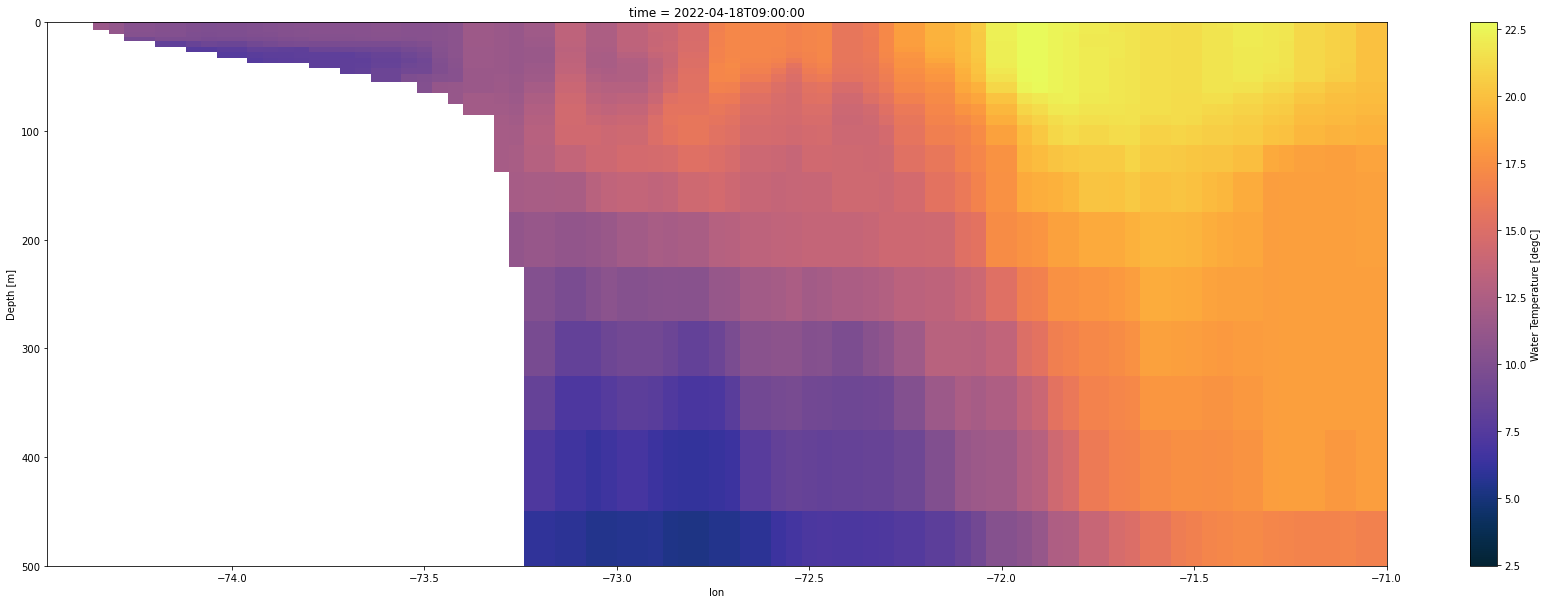

In [40]:
ads.water_temp.plot(x="lon", y="depth", figsize=(30,10), clim=(12, 16), cmap=cm.thermal)
plt.ylim([500, 0])

In [29]:
# Advanced interpolation
ids = ds.interp(lon=lon_da, lat=lat_da)
# ids

(500.0, 0.0)

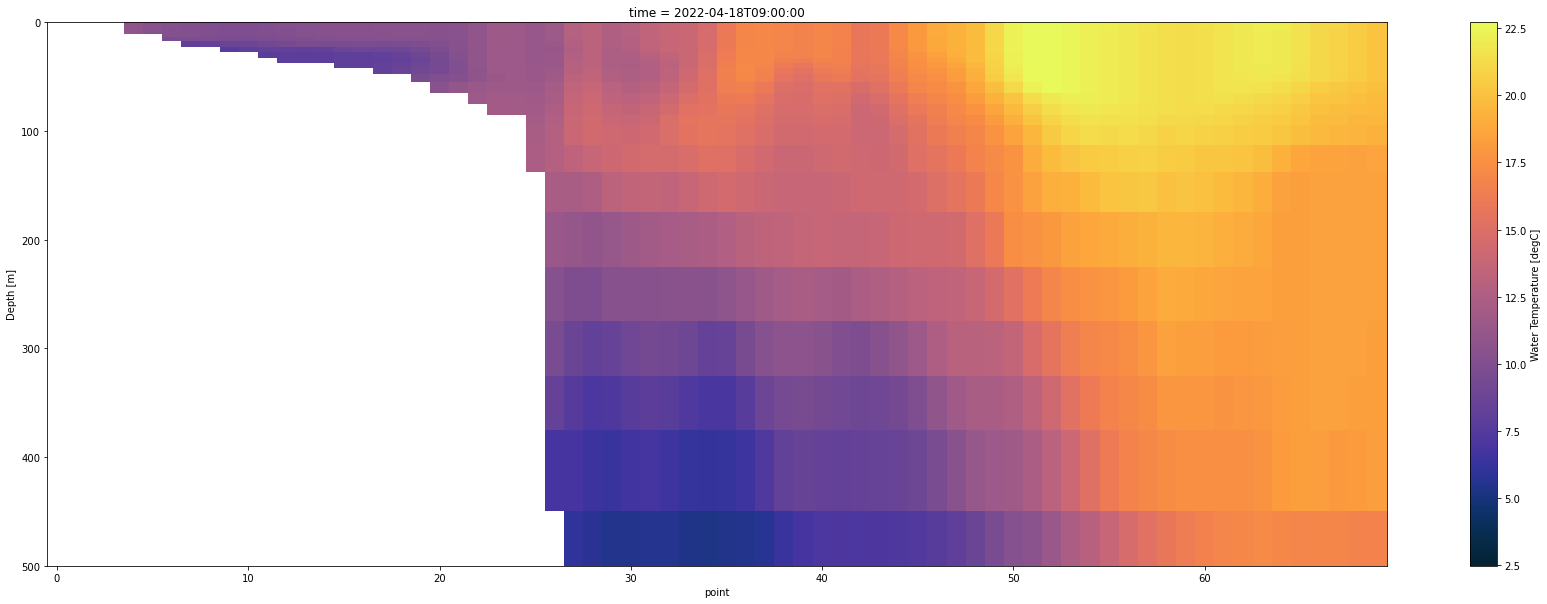

In [30]:
ids.water_temp.plot(x="point", y="depth", figsize=(30,10), clim=(12, 16), cmap=cm.thermal)
plt.ylim([500, 0])

(500.0, 0.0)

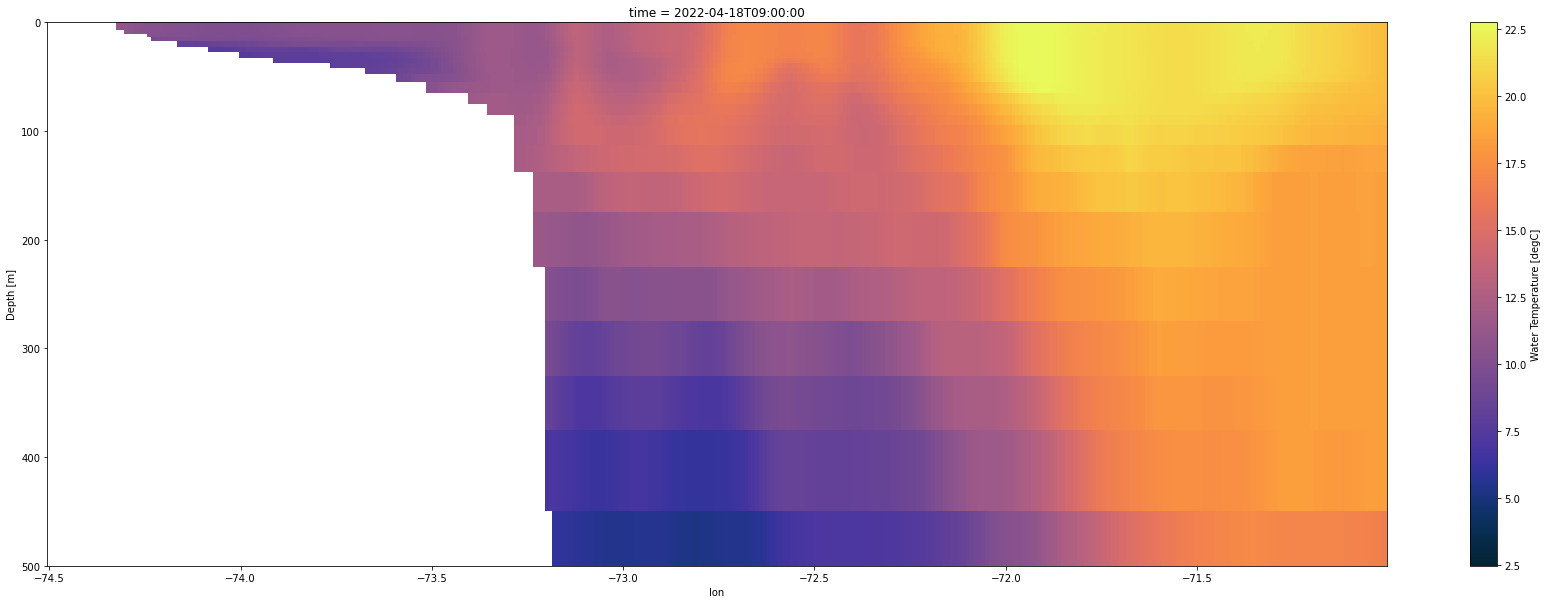

In [31]:
tlons, tlats, tdist = calculate_transect(transect_start[0], transect_start[1], transect_end[0], transect_end[1], .01)

lon_da = xr.DataArray(tlons, dims="point")
lat_da = xr.DataArray(tlats, dims="point")

# Interpolate
ids = ds.interp(lon=lon_da, lat=lat_da)

# Plot
ids.water_temp.plot(x="lon", y="depth", figsize=(30,10), clim=(12, 16), cmap=cm.thermal)
plt.ylim([500, 0])

In [32]:
n = 10
depth_interp = np.arange(0, ids.depth.max()+n, n)
depth_interp = xr.DataArray(depth_interp, dims="depth")
depth_interp

<xarray.DataArray (depth: 501)>
array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
        270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
        360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
        450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
        630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
        720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
        810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
        900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,
        990., 1000., 1010., 1020., 1030., 1040., 1050., 1060., 1070.,
       1080., 1090., 1100., 1110., 1120., 1130., 1140., 1150., 1160.,
       1170., 1180., 1190., 1200., 1210., 1220., 1230., 1240., 1250.,
       1260., 1270., 1280., 1290., 1300., 1310., 1320., 1330., 1340.,
       1350., 1360., 1370., 1380., 1390., 1400., 1410., 1420., 1430.,
       1440., 1450., 1460., 1470., 1480., 1490., 1500., 1510., 1520.,
       1530., 1540., 1550., 1560., 1570., 1580., 1590., 1600., 1610.,
       1620., 1630., 1640., 1650., 1660., 1670., 1680., 1690., 1700.,
       1710., 1720., 1730., 1740., 1750., 1760., 1770., 1780., 1790.,
...
       3240., 3250., 3260., 3270., 3280., 3290., 3300., 3310., 3320.,
       3330., 3340., 3350., 3360., 3370., 3380., 3390., 3400., 3410.,
       3420., 3430., 3440., 3450., 3460., 3470., 3480., 3490., 3500.,
       3510., 3520., 3530., 3540., 3550., 3560., 3570., 3580., 3590.,
       3600., 3610., 3620., 3630., 3640., 3650., 3660., 3670., 3680.,
       3690., 3700., 3710., 3720., 3730., 3740., 3750., 3760., 3770.,
       3780., 3790., 3800., 3810., 3820., 3830., 3840., 3850., 3860.,
       3870., 3880., 3890., 3900., 3910., 3920., 3930., 3940., 3950.,
       3960., 3970., 3980., 3990., 4000., 4010., 4020., 4030., 4040.,
       4050., 4060., 4070., 4080., 4090., 4100., 4110., 4120., 4130.,
       4140., 4150., 4160., 4170., 4180., 4190., 4200., 4210., 4220.,
       4230., 4240., 4250., 4260., 4270., 4280., 4290., 4300., 4310.,
       4320., 4330., 4340., 4350., 4360., 4370., 4380., 4390., 4400.,
       4410., 4420., 4430., 4440., 4450., 4460., 4470., 4480., 4490.,
       4500., 4510., 4520., 4530., 4540., 4550., 4560., 4570., 4580.,
       4590., 4600., 4610., 4620., 4630., 4640., 4650., 4660., 4670.,
       4680., 4690., 4700., 4710., 4720., 4730., 4740., 4750., 4760.,
       4770., 4780., 4790., 4800., 4810., 4820., 4830., 4840., 4850.,
       4860., 4870., 4880., 4890., 4900., 4910., 4920., 4930., 4940.,
       4950., 4960., 4970., 4980., 4990., 5000.])
Dimensions without coordinates: depth

In [33]:
dds = ids.interp(depth=depth_interp)
dds

<xarray.Dataset>
Dimensions:            (point: 350, depth: 501)
Coordinates:
    time               datetime64[ns] 2022-04-18T09:00:00
    lon                (point) float64 -74.5 -74.49 -74.48 ... -71.02 -71.01
    lat                (point) float64 39.5 39.49 39.49 ... 37.02 37.01 37.01
  * depth              (depth) float64 0.0 10.0 20.0 ... 4.98e+03 4.99e+03 5e+03
Dimensions without coordinates: point
Data variables:
    surf_el            (point) float64 nan nan nan nan ... 0.1147 0.117 0.1194
    water_temp         (depth, point) float64 nan nan nan nan ... nan nan nan
    water_temp_bottom  (point) float64 nan nan nan nan ... 2.466 2.464 2.463
    salinity           (depth, point) float64 nan nan nan nan ... nan nan nan
    salinity_bottom    (point) float64 nan nan nan nan ... 34.94 34.94 34.94
    water_u            (depth, point) float64 nan nan nan nan ... nan nan nan
    water_u_bottom     (point) float64 nan nan nan ... 0.0587 0.05859 0.05852
    water_v            (depth, point) float64 nan nan nan nan ... nan nan nan
    water_v_bottom     (point) float64 nan nan nan nan ... 0.1789 0.1774 0.1759
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1

(500.0, 0.0)

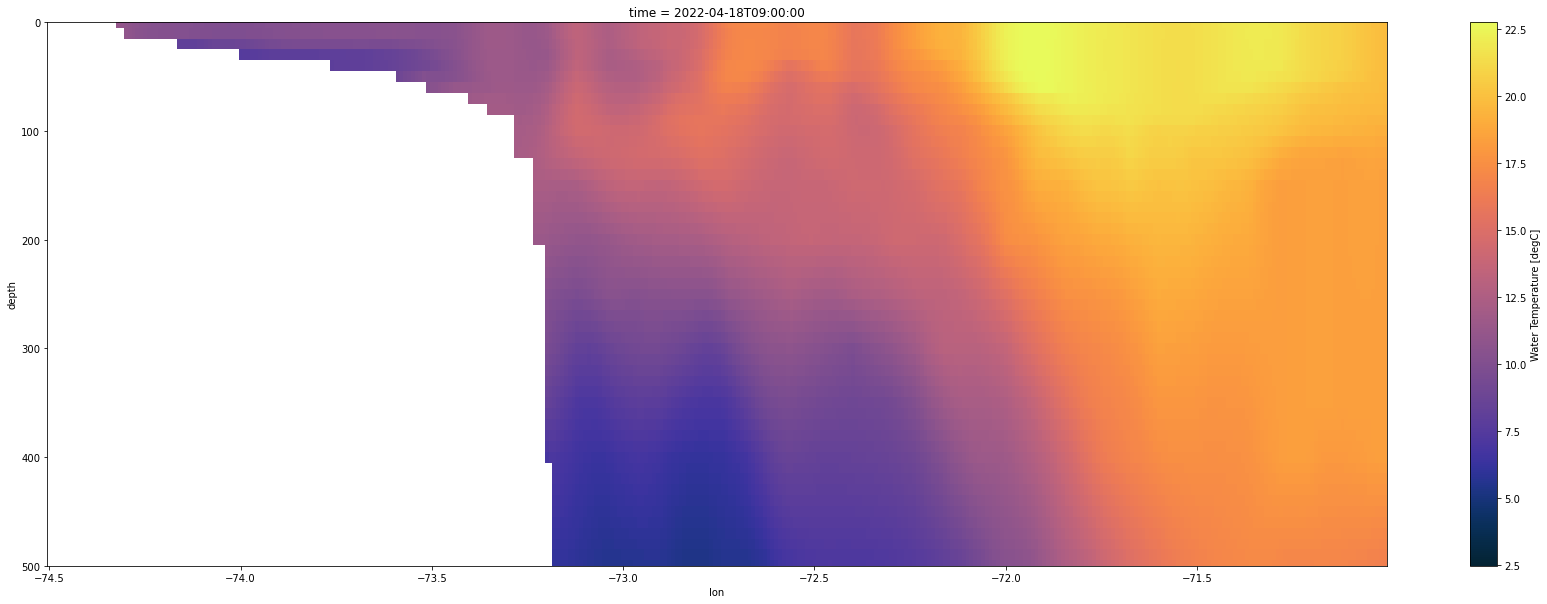

In [34]:
# Plot
dds.water_temp.plot(x="lon", y="depth", figsize=(30,10), clim=(12, 16), cmap=cm.thermal)
plt.ylim([500, 0])

(4000.0, 0.0)

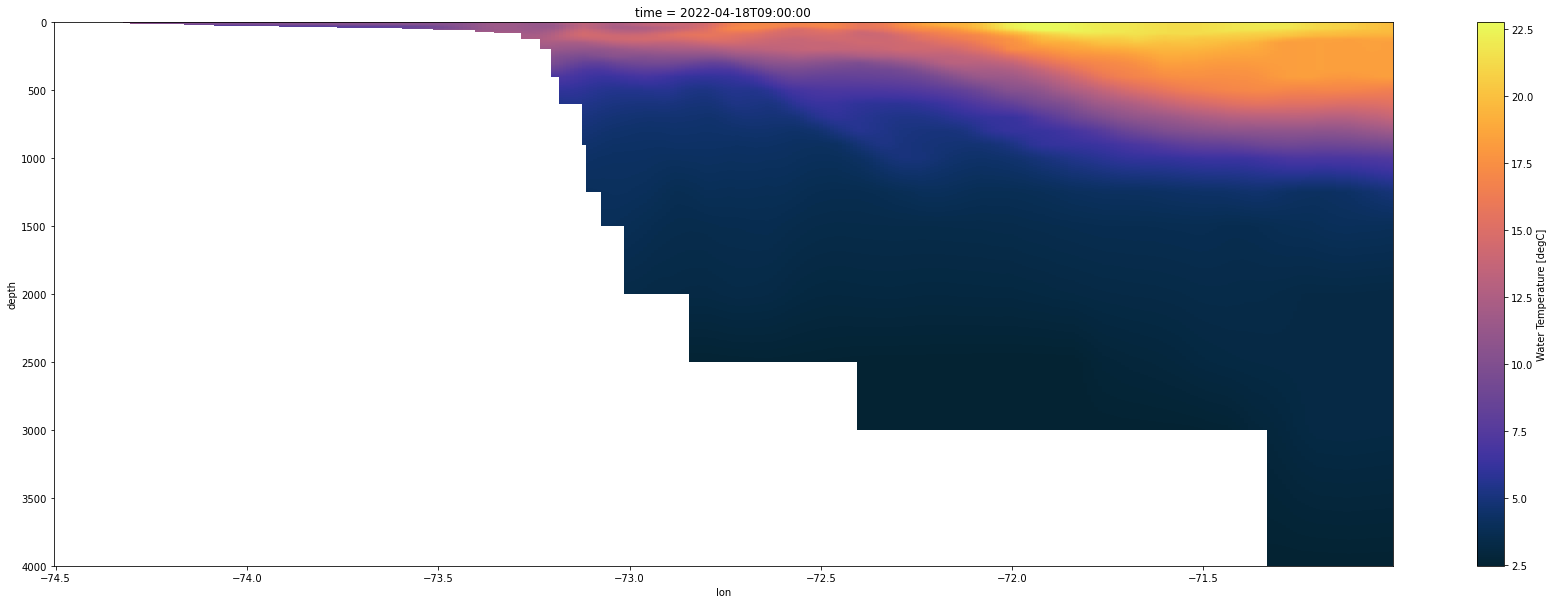

In [38]:
grid_spacing = .01
depth_spacing = 1 # meters between each depth

tlons, tlats, tdist = calculate_transect(transect_start[0], transect_start[1], transect_end[0], transect_end[1], grid_spacing)

# Create depth spacing you want to interpole to
n = depth_spacing
depth_interp = np.arange(0, ds.depth.max()+n, n)

# Interpolate
fds = ds.interp(
    lon=xr.DataArray(tlons, dims="point"),
    lat=xr.DataArray(tlats, dims="point"), 
    depth=xr.DataArray(depth_interp, dims="depth")
)

# Plot
fds.water_temp.plot(x="lon", y="depth", figsize=(30,10), clim=(12, 16), cmap=cm.thermal)
plt.ylim([4000, 0])